## Introduction

One of the most critical issues that the finance sector faces is fraud. The fraud impacts the bottom line of a financial institution. It is estimated that a typical financial institution loses  of its revenue to fraud. If we apply this estimate to the Gross World Product of $79.6, the global loss during 2017 was $4 trillion (more than the GDP of India)

Machine learning models can detect such Fraud. The machine learning models can detect anomalies in the transactions and detect cases that might be prone to fraud. The machine learning models can compute faster as compared to the traditional rule-based approaches.

## Problem Statement

Define Research Goals
The goal of the project is to detect whether a transaction is a normal payment or a fraud.

## Data Set

The dataset contains two-day transactions by European cardholders during September 2013.

The dataset contains 284,807 transactions out of which 492 were fraud cases

Due to the privacy reasons, the dataset has been anonymized. The feature names have also been changed (V1, V2, V3, etc.). Hence, you will not gain much insights from visualization

## Import Python Packages

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot

In [2]:
from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix

In [3]:
fraud_data = read_csv('creditcard.csv')

## Understanding Data

1. View the raw data
2. Dimensions of the dataset
3. Data Types of the attributes
4. Presence of Null Values in the dataset
5. Statistical Analysis

In [4]:
set_option('display.width', 100)

In [5]:
fraud_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
fraud_data.shape

(284807, 31)

We get the dimension of the dataset. The dataset has 284,807 rows and 31 columns.

In [7]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

# Our observations are as follows

NaN values do not present in the data set. Because of the Non-Null Count and number of rows in the dataset match.
There are 29 Input Variables and 1 Output Variable (Class)
The data type of all the input variables is float64 whereas the data type of out variable (Class) is int64

In [8]:
fraud_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

# Exploratory Data Analysis

## Statistical Analysis of data

In [9]:
# set_option('precision', 2)

In [10]:
fraud_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [11]:
fraud_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


We can see that the data for the variables from V1 to V28 is already scaled and cleaned. So there is no need for a data cleaning process in this case

## Response Variable Analysis

In [12]:
class_name = {0: 'Not Fraud', 1: 'Fraud'}
print(fraud_data.Class.value_counts().rename(index = class_name))

Class
Not Fraud    284315
Fraud           492
Name: count, dtype: int64


## Train-Test Split

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
y = fraud_data['Class']

In [15]:
X = fraud_data.loc[:, fraud_data.columns != 'Class']

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42,stratify=y)

# Data Modeling

Linear Algorithms

Logistic Regression (LR) and Linear Discriminant Analysis(LDA)

Non-Linear Algorithms

Classification and Regression Tree (CART) and K-Nearest Neighbours

## Logistic Regression

In [17]:
from sklearn.metrics import accuracy_score

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
logisreg = LogisticRegression()

In [20]:
logisreg.fit(X_train, y_train)

C:\Users\mukes\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [21]:
y_pred = logisreg.predict(X_test)

In [22]:
acc_logisreg = round(accuracy_score(y_test, y_pred) * 100,2)

In [23]:
print('Accuracy of Logistic Regression model : ', acc_logisreg)

Accuracy of Logistic Regression model :  99.91


## Linear Discriminant Analysis

In [24]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [25]:
model = LinearDiscriminantAnalysis()

In [26]:
model.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [27]:
y_pred = model.predict(X_test)

In [28]:
acc_lda = round(accuracy_score(y_test, y_pred) * 100,2)

In [29]:
print('Accuracy of Linear Discriminant Analysis Classifier : ', acc_lda)

Accuracy of Linear Discriminant Analysis Classifier :  99.93


## Gaussian Naive Bayes

In [30]:
from sklearn.naive_bayes import GaussianNB

In [31]:
model = GaussianNB()

In [32]:
model.fit(X_train, y_train)

GaussianNB()

In [33]:
y_pred = model.predict(X_test)

In [34]:
acc_ganb = round(accuracy_score(y_test, y_pred)*100,2)

In [35]:
print('Accuracy of Gaussian Naive Bayes : ', acc_ganb)

Accuracy of Gaussian Naive Bayes :  99.28


## Decision Tree

In [36]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
model = DecisionTreeClassifier()

In [38]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [39]:
y_pred = model.predict(X_test)

In [40]:
acc_dtree = round(accuracy_score(y_test, y_pred)*100,2)

In [41]:
print('Accuracy of Decision Tree Classifier : ', acc_dtree)

Accuracy of Decision Tree Classifier :  99.92


## Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
model = RandomForestClassifier()

In [44]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [45]:
y_pred = model.predict(X_test)

In [46]:
acc_rf = round( accuracy_score(y_test, y_pred) * 100, 2 )

In [47]:
print( 'Accuracy of  Random Forest : ', acc_rf)

Accuracy of  Random Forest :  99.96


## Support Vector Machine Model

In [48]:
from sklearn import svm

In [49]:
model = svm.SVC()

In [50]:
model.fit(X_train, y_train)

SVC()

In [51]:
y_pred = model.predict(X_test)

In [52]:
acc_svc = round( accuracy_score(y_test, y_pred) * 100, 2 )

In [53]:
print( 'Accuracy of  Support Vector Classifier: ', acc_svc)

Accuracy of  Support Vector Classifier:  99.83


## K Nearest Neighbour Model

In [54]:
from sklearn.neighbors import KNeighborsClassifier

In [55]:
model = KNeighborsClassifier()

In [56]:
model.fit(X_train,y_train)

KNeighborsClassifier()

In [57]:
# y_pred = model.predict(X_test)

In [58]:
acc_knn = round( accuracy_score(y_test, y_pred) * 100, 2 )

In [59]:
print( 'Accuracy of  KNN Classifier: ', acc_knn)

Accuracy of  KNN Classifier:  99.83


## Model Selection

In [60]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Linear Discriminant Analysis','Naive Bayes', 'Decision Tree', 'Random Forest', 'Support Vector Machines', 
              'K - Nearest Neighbors'],
    'Score': [acc_logisreg, acc_lda, acc_ganb, acc_dtree, acc_rf, acc_svc, acc_knn]})

In [61]:
models.sort_values(by='Score', ascending=False)

,Model,Score
4,Random Forest,99.96
1,Linear Discriminant Analysis,99.93
3,Decision Tree,99.92
0,Logistic Regression,99.91
5,Support Vector Machines,99.83
6,K - Nearest Neighbors,99.83
2,Naive Bayes,99.28


We can select the Random Forest as it has given us the maximum accuracy

## Confusion Matrix

ACCURACY

Accuracy is the ratio of correct predictions made and all the predictions made. This is the most common evaluation metric for classification problems. However, it is also the most misused. We should use accuracy when there is an equal number of observations in each class (which is rarely the case) and when all predictions and the related prediction errors are equally important, which is often not the case.

PRECISION

Precision is the percentage of positive instances out of the total predicted positive instances. Here, the denominator is the model prediction done as positive from the whole given dataset. Precision is a good measure to determine when the cost of false positives is high (e.g., email spam detection).

RECALL

Recall (or sensitivity or true positive rate) is the percentage of positive instances out of the total actual positive instances. Therefore, the denominator (true positive + false negative) is the actual number of positive instances present in the dataset. The recall is a good measure when there is a high cost associated with false negatives (e.g., fraud detection).

In [67]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
cm = confusion_matrix(y_test, y_pred)

In [69]:
cm

array([[94772,     0],
       [  164,     0]], dtype=int64)

In [81]:
# cm = confusion_matrix(y_test, model.predict(X_test))

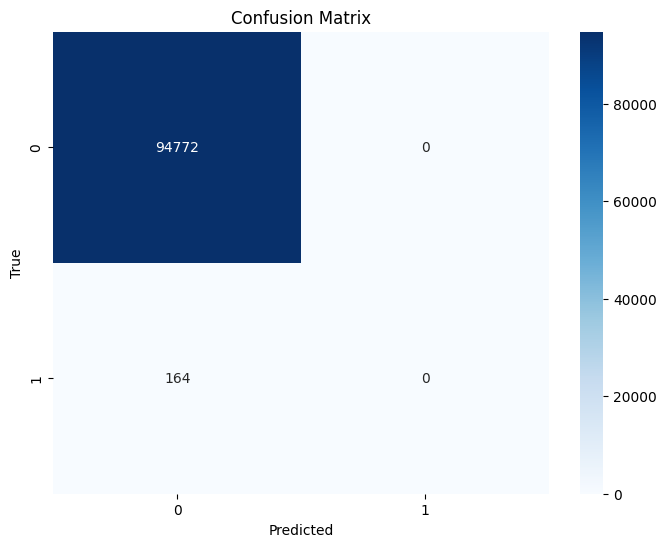

In [82]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()